<a href="https://colab.research.google.com/github/qarni4126-ui/SVCproj/blob/main/SVCproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

In [50]:
dataset= load_wine()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [73]:
df.keys()

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [51]:
df = df.dropna()

In [52]:
x=dataset.data
y=dataset.target

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.svm import SVC
model=SVC()

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4]
}

In [68]:
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [69]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
0.9576354679802955


In [57]:
y_pred=grid.predict(x_test)

In [72]:
accuracy_score=accuracy_score(y_pred,y_test)
print(score)

1.0


In [59]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [61]:
results = pd.DataFrame(grid.cv_results_)

In [70]:
linear_results = results[results['param_kernel'] == 'linear']
pivot_table = linear_results.pivot_table(
    values='mean_test_score',
    index='param_C',
    columns='param_gamma'
)

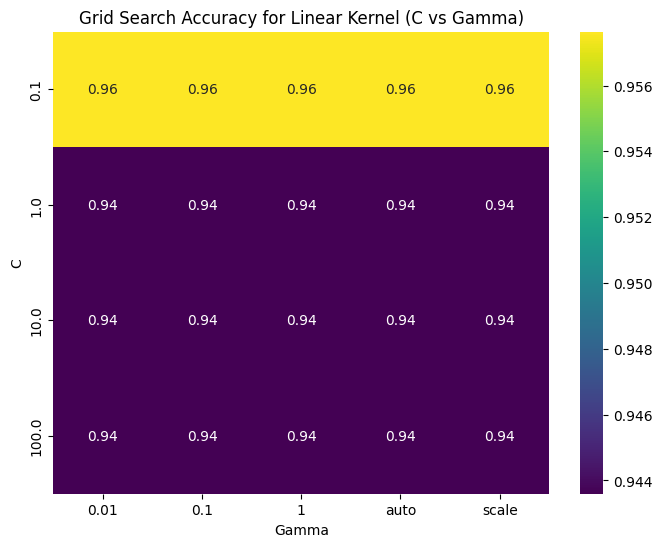

In [127]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Grid Search Accuracy for Linear Kernel (C vs Gamma)')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

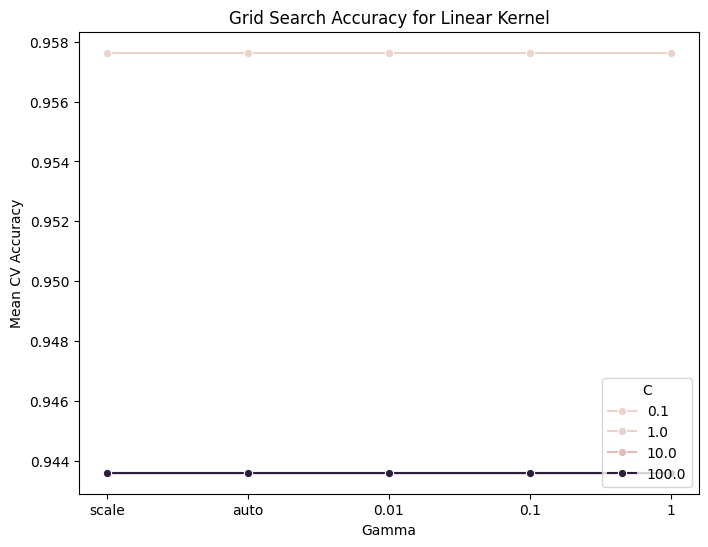

In [126]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=linear_results,
    x=linear_results['param_gamma'].astype(str), # Convert to string
    y='mean_test_score',
    hue='param_C',
    marker='o'
)

# plt.xscale('log')  # Removing log scale for now as it conflicts with string type
plt.title('Grid Search Accuracy for Linear Kernel')
plt.xlabel('Gamma') # Updated label since it's not a log scale anymore
plt.ylabel('Mean CV Accuracy')
plt.legend(title='C', loc='lower right')
plt.show()